In [ ]:
# Using PIL

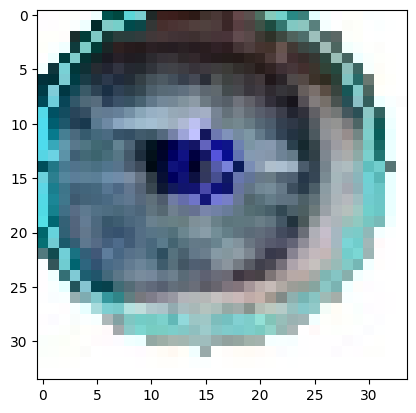

255 252 255


In [268]:
from PIL import Image
import numpy as np

# Opening the image and converting
# it to RGB color mode
# IMAGE_PATH => Path to the image
img = Image.open('/home/roopesh/Desktop/HSL/New_Blue_Eyes/Blue_Iris_Mask/image782.jpg.jpg')

plt.imshow(img)
plt.show()

r,g,b =img.getpixel((0,0))

print(r,g,b)

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

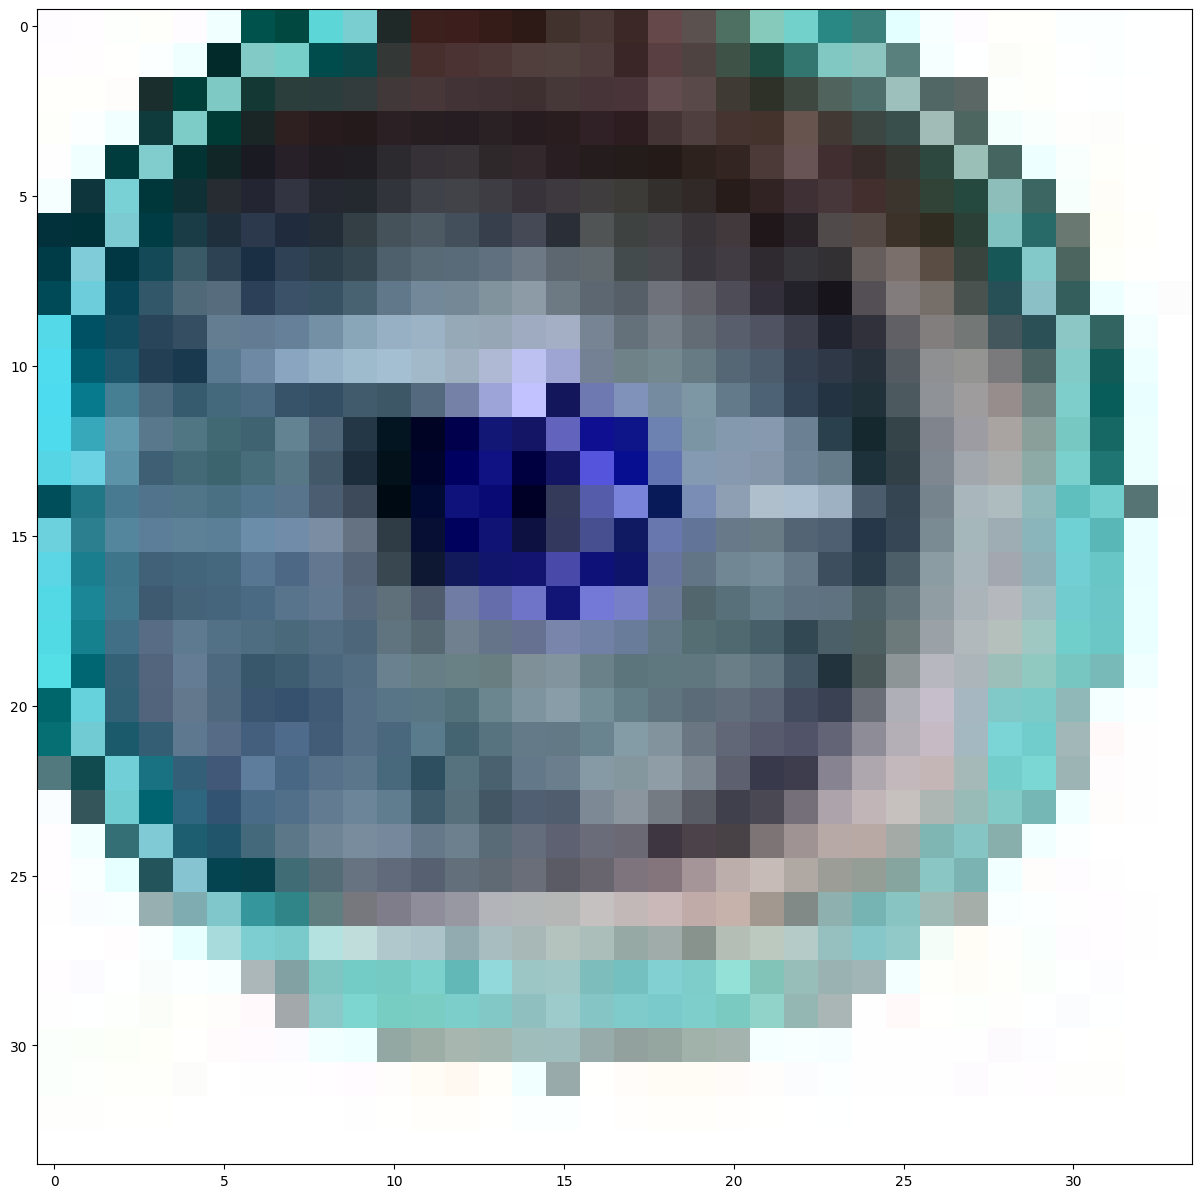

In [280]:
# Only Red Pixel value , higher than 10
# pic = imageio.imread('F:\satimg.jpg')
import imageio
pic= imageio.imread('/home/roopesh/Desktop/HSL/New_Blue_Eyes/Blue_Iris_Mask/image782.jpg.jpg')
red_mask = ((pic[:, :, 0] < 10) & (pic[:, :, 0] >240))

pic[red_mask] = 0
plt.figure(figsize=(15,15))
# plt.imshow(pic)


# Only Green Pixel value , higher than 10
pic= imageio.imread('/home/roopesh/Desktop/HSL/New_Blue_Eyes/Blue_Iris_Mask/image782.jpg.jpg')
green_mask = ((pic[:, :, 1] < 10) & (pic[:, :, 0] >240))


pic[green_mask] = 0
plt.figure(figsize=(15,15))
# plt.imshow(pic)


# Only Blue Pixel value , higher than 10
pic= imageio.imread('/home/roopesh/Desktop/HSL/New_Blue_Eyes/Blue_Iris_Mask/image782.jpg.jpg')
blue_mask = ((pic[:, :, 2] < 10) & (pic[:, :, 0] >240))

pic[blue_mask] = 0
plt.figure(figsize=(15,15))
# plt.imshow(pic)

# Composite mask using logical_and
pic= imageio.imread('/home/roopesh/Desktop/HSL/New_Blue_Eyes/Blue_Iris_Mask/image782.jpg.jpg')
final_mask = np.logical_and(red_mask, green_mask, blue_mask)
pic[final_mask] = 40
plt.figure(figsize=(15,15))
plt.imshow(pic)
plt.show()

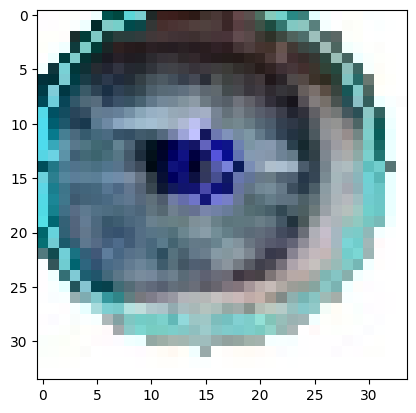

In [281]:
from PIL import Image
import numpy as np

# Opening the image and converting
# it to RGB color mode
# IMAGE_PATH => Path to the image
img = Image.open('/home/roopesh/Desktop/HSL/New_Blue_Eyes/Blue_Iris_Mask/image782.jpg.jpg')

plt.imshow(img)
plt.show()


In [ ]:
# REMOVE NOISE USING OPENCV AND NUMPY and check using PANDAS 

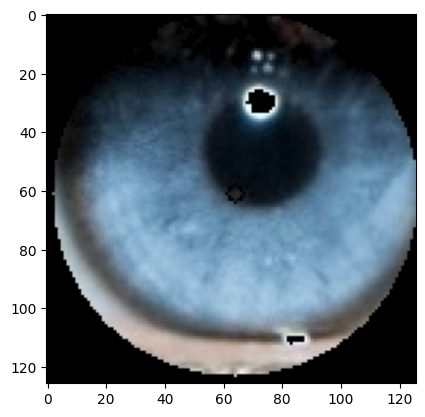

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

image = cv2.imread('/home/roopesh/Desktop/HSL/New_Blue_Eyes/Mask/Blue_Iris_Mask/image8.jpg.jpg')
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

crop= np.array(img)

mask=np.all(crop<=[10,10,10], axis=2)
crop[mask]=[0,0,0]
mask=np.all(crop>=[240,240,240],axis=2)
crop[mask]=[0,0,0]
mask=np.all(crop ==[255,255,255],axis=2)
crop[mask]=[0,0,0]
mask=np.all(crop ==[0,255,255],axis=2)
crop[mask]=[0,0,0]
# crop=Image.fromarray(crop,'RGB')
plt.imshow(crop)
plt.savefig("/home/roopesh/Desktop/image782.jpg")
plt.show()

           

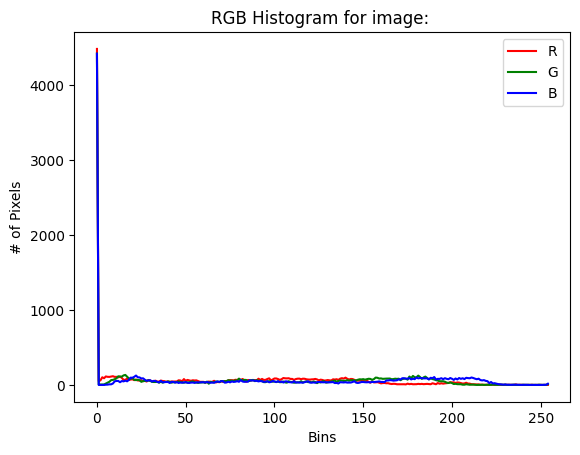

In [13]:
r, g, b = crop[:,:,0], crop[:,:,1], crop[:,:,2]
hist_r = cv2.calcHist([r],[0],None,[255],[0,256])
hist_g = cv2.calcHist([g],[0],None,[255],[0,256])
hist_b = cv2.calcHist([b],[0],None,[255],[0,256])
plot= plt.plot(hist_r, color='r', label="R")
plt.plot(hist_g, color='g', label="G")
plt.plot(hist_b, color='b', label="B")
plt.title("RGB Histogram for image: " )
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.legend()
plt.show()

In [14]:
#  Checking if any A

In [15]:
img1=np.array(crop)

In [16]:
# # resize 3d to 2d numpy array
resized = img1
    # # Dimensions: [m, n, 3]
resized = resized.transpose()
    # # Dimensions: [3, m, n]
resized = resized.reshape( (resized.shape[1]*resized.shape[2]),resized.shape[0]) # re shaping by multiplying (height*width), channel to make 2d
    #

In [17]:
crop = pd.DataFrame(resized)

In [18]:
crop

,0,1,2
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
15871,0,0,0
15872,0,0,0
15873,0,0,0
15874,0,0,0


In [19]:
print(crop[(crop <=10).all(1)])
print(crop[(crop ==255).all(1)]) 



       0  1  2
0      0  0  0
1      0  0  0
2      0  0  0
3      0  0  0
4      0  0  0
...   .. .. ..
15871  0  0  0
15872  0  0  0
15873  0  0  0
15874  0  0  0
15875  0  0  0

[4377 rows x 3 columns]
Empty DataFrame
Columns: [0, 1, 2]
Index: []
